# Forward and Backpropagation with High School Mathematics

> ***Problem statement*** - Classify the hand written digits with help of a basic neural net designed from scratch

> ***Data*** -  MNIST data present at https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer

> ***Methodology*** Write the forward and backpropagation functions from scratch using simple maths and calculus

# Imports and Data downloads

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/mnist-digit-recognizer/train.csv')


In [2]:
data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(42000, 785)

### Split the data into train and test sets

> _Transpose the data, so that one column is one image. The shape would be 785*42000 after transpose_

### One very important step is to normalise the train and test sets, without which training will be either slow or just not effective at all. X/255 takes care of the same

In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into test and training sets

data_test = data[0:2000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

data_train = data[2000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [6]:
X_train.shape

(784, 40000)

In [7]:
Y_train


array([2, 6, 7, ..., 9, 5, 6])

# Neural Net Design

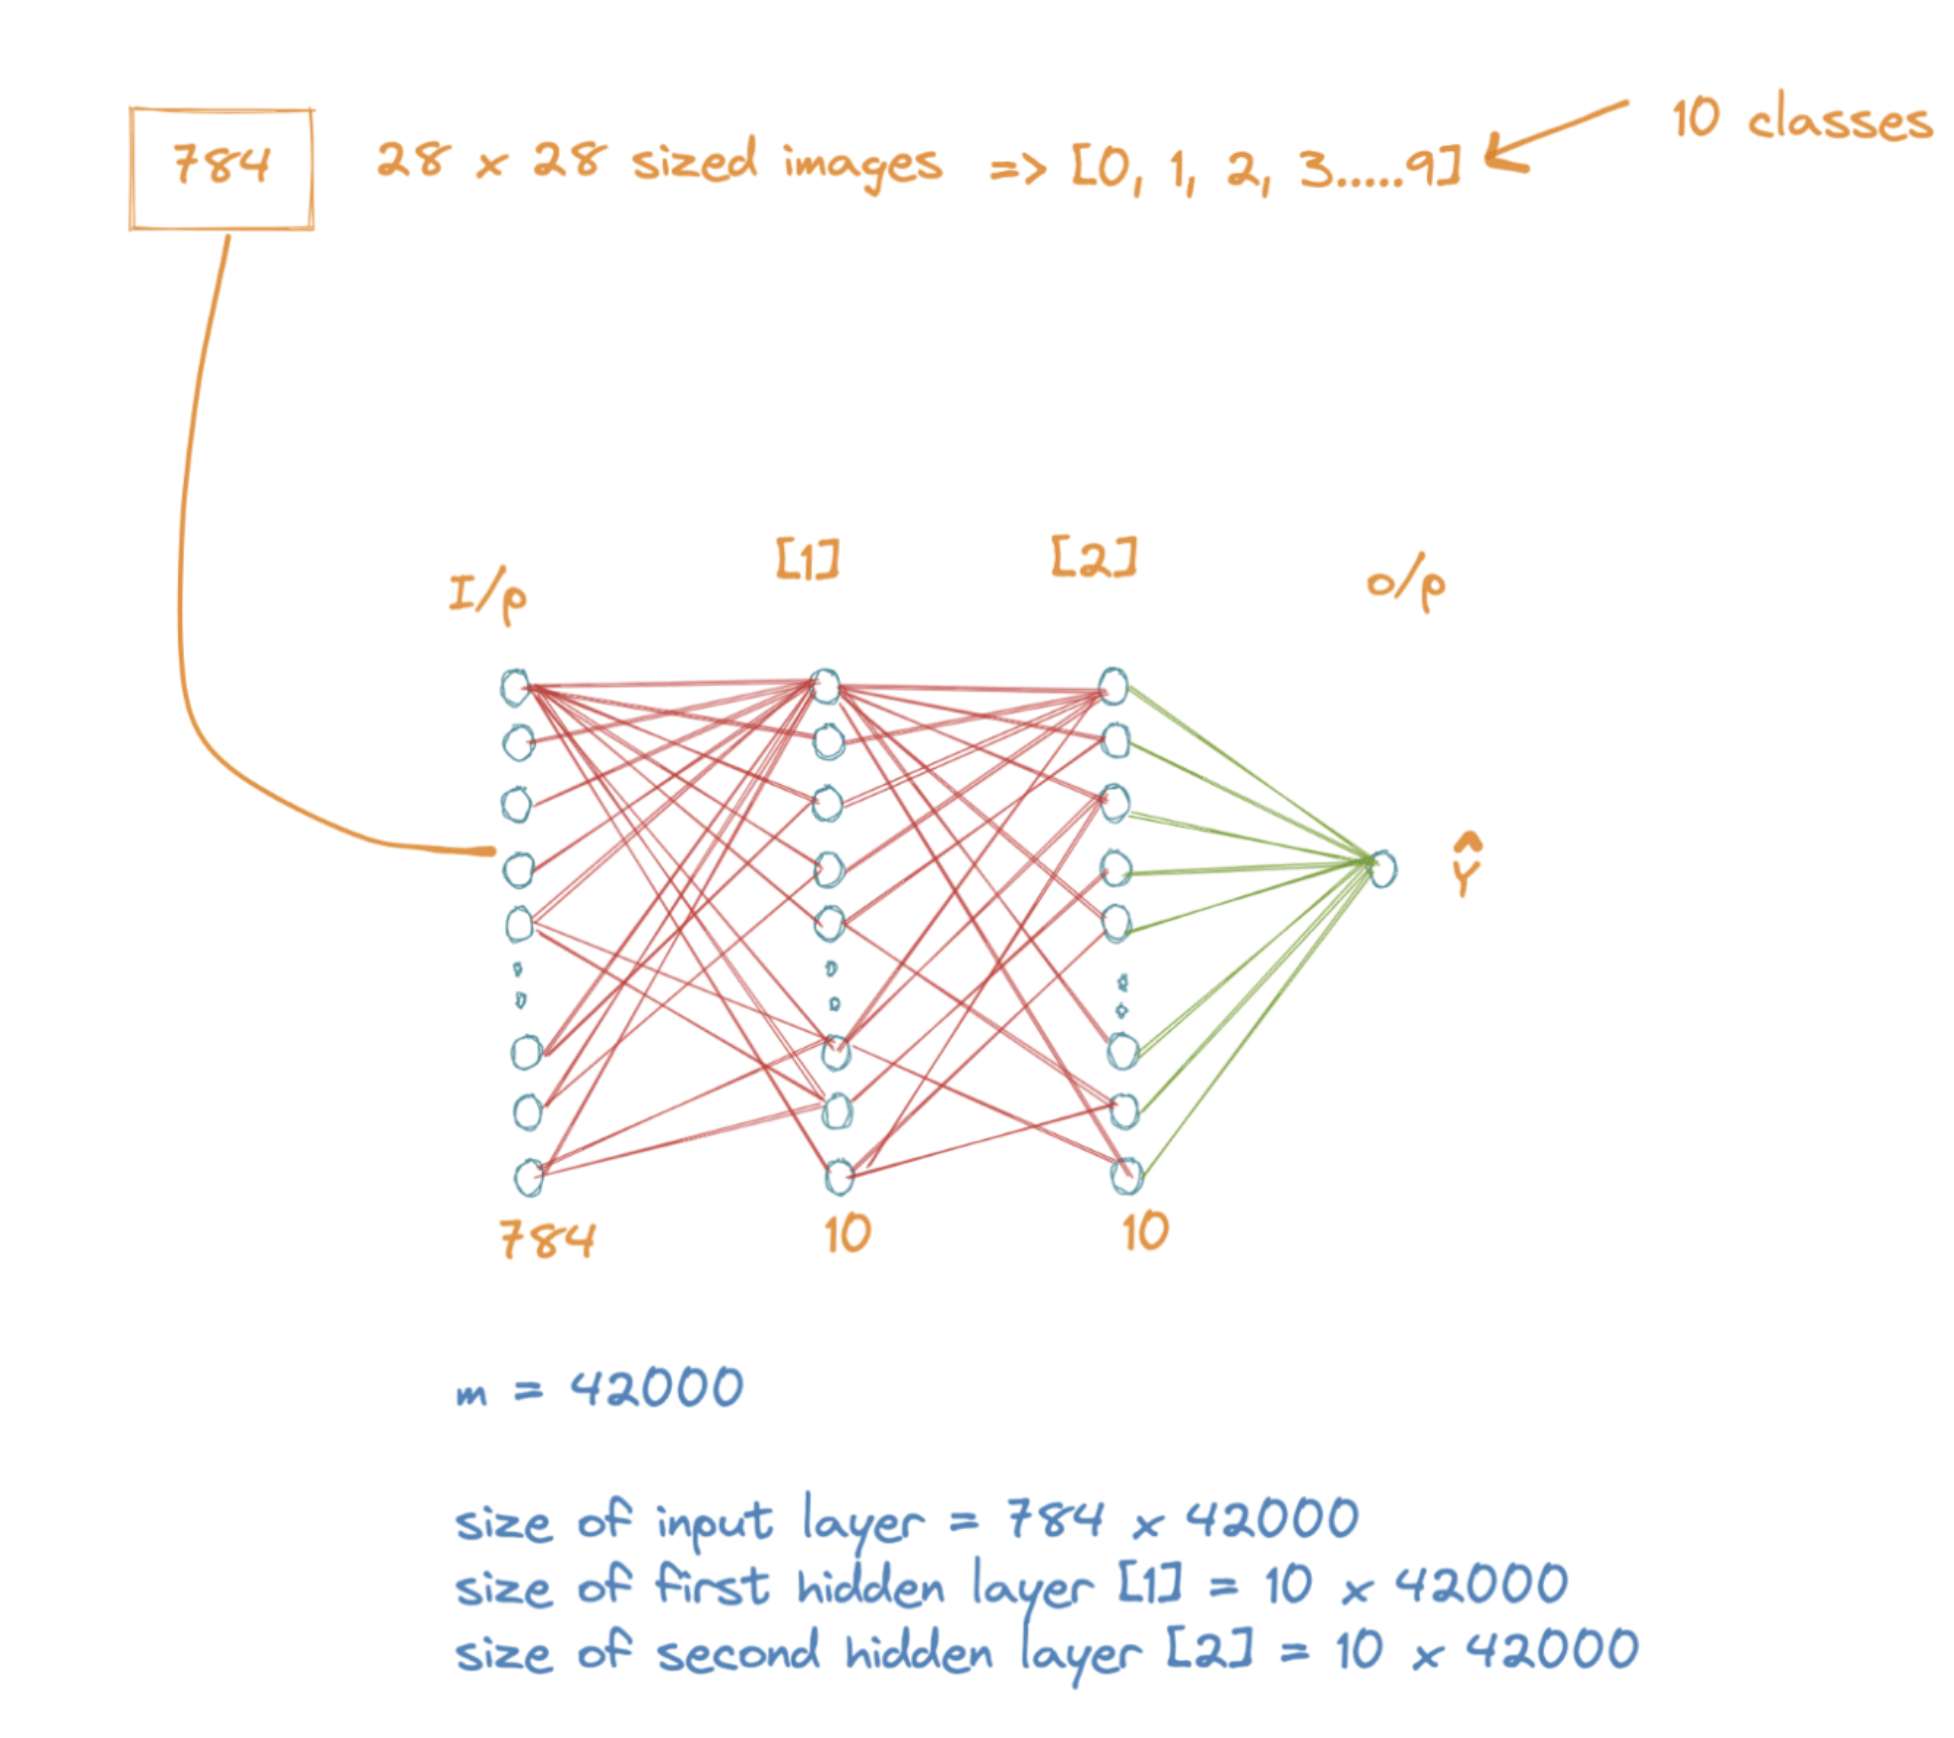

## Let's conceptualise the mathematics in the form of equations

> ## ***Forward Propagation***

> ## ***Backward Propagation***

> ## ***Updating the weights***

## The calculus involves the chain rule

### In the above figure, if we want to update the weight of w5 then, we need to take the partial derivative of Total Error function wrt w5. 

### But total error doesn't contain any term with w5, so we use chain rule

# Let's code the above mathematics into python functions

In [8]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = 2*(A2 - one_hot_Y)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
   # print(W1.shape)
   # print(dW1.shape)
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

> ## _That's where we do the Gradient Descent. We call it gradient descent not Stochastic Gradient Descent because we are running the net on entire dataset at once and will tweak all the weights and biases to update the parameters_

In [9]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        #print(W1.shape)
        #print(dW1.shape)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

### Let's run for 500 iterations

In [10]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)


Iteration:  0
[1 6 4 ... 6 1 6] [2 6 7 ... 9 5 6]
0.115775
Iteration:  10
[1 6 4 ... 4 1 6] [2 6 7 ... 9 5 6]
0.21905
Iteration:  20
[1 6 0 ... 0 1 0] [2 6 7 ... 9 5 6]
0.25965
Iteration:  30
[1 6 0 ... 0 3 6] [2 6 7 ... 9 5 6]
0.336025
Iteration:  40
[2 6 0 ... 0 3 6] [2 6 7 ... 9 5 6]
0.421125
Iteration:  50
[2 6 9 ... 0 5 6] [2 6 7 ... 9 5 6]
0.50025
Iteration:  60
[2 6 7 ... 0 5 6] [2 6 7 ... 9 5 6]
0.5673
Iteration:  70
[2 6 7 ... 4 5 6] [2 6 7 ... 9 5 6]
0.6161
Iteration:  80
[2 6 9 ... 9 5 6] [2 6 7 ... 9 5 6]
0.655525
Iteration:  90
[2 6 9 ... 4 5 6] [2 6 7 ... 9 5 6]
0.684975
Iteration:  100
[2 6 7 ... 4 5 6] [2 6 7 ... 9 5 6]
0.709775
Iteration:  110
[2 6 7 ... 4 5 6] [2 6 7 ... 9 5 6]
0.727575
Iteration:  120
[2 6 7 ... 4 5 6] [2 6 7 ... 9 5 6]
0.7433
Iteration:  130
[2 6 7 ... 4 5 6] [2 6 7 ... 9 5 6]
0.7566
Iteration:  140
[2 6 7 ... 4 5 6] [2 6 7 ... 9 5 6]
0.76835
Iteration:  150
[2 6 7 ... 4 5 6] [2 6 7 ... 9 5 6]
0.77935
Iteration:  160
[2 6 7 ... 4 5 6] [2 6 7 ... 9 5

In [11]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    

Prediction:  [2]
Label:  2


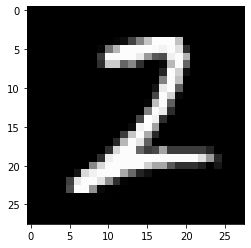

Prediction:  [6]
Label:  6


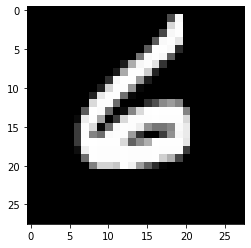

Prediction:  [7]
Label:  7


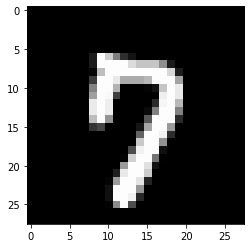

Prediction:  [8]
Label:  8


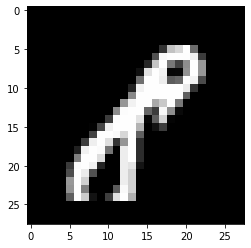

Prediction:  [9]
Label:  9


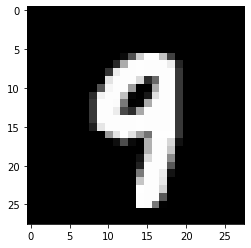

In [12]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(100, W1, b1, W2, b2)
test_prediction(200, W1, b1, W2, b2)



In [13]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

[5 2 5 ... 4 1 0] [5 2 5 ... 4 1 0]


0.867

## Accuracy of 86% on the test set.

# End of notebook